**Assignment-5**

**Name**- Prashant Singh

**Enrollment No.**- SAU/CS/Mtech(CS)/2024/04

**Course**- Data Mining

**Question**:

Implement Decision Trees.

Q-1) ID3

Q-2) C4.5

Q-3) CART

**Importing Libraries and Datset**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import copy

In [ ]:
dataset = pd.read_csv('/content/PlayTennis.csv')
X = dataset.iloc[:,:].values
X

array([['Sunny', 'Hot', 'High', 'Weak', 'No'],
       ['Sunny', 'Hot', 'High', 'Strong', 'No'],
       ['Overcast', 'Hot', 'High', 'Weak', 'Yes'],
       ['Rain', 'Mild', 'High', 'Weak', 'Yes'],
       ['Rain', 'Cool', 'Normal', 'Weak', 'Yes'],
       ['Rain', 'Cool', 'Normal', 'Strong', 'No'],
       ['Overcast', 'Cool', 'Normal', 'Strong', 'Yes'],
       ['Sunny', 'Mild', 'High', 'Weak', 'No'],
       ['Sunny', 'Cool', 'Normal', 'Weak', 'Yes'],
       ['Rain', 'Mild', 'Normal', 'Weak', 'Yes'],
       ['Sunny', 'Mild', 'Normal', 'Strong', 'Yes'],
       ['Overcast', 'Mild', 'High', 'Strong', 'Yes'],
       ['Overcast', 'Hot', 'Normal', 'Weak', 'Yes'],
       ['Rain', 'Mild', 'High', 'Strong', 'No']], dtype=object)

In [ ]:
attribute = ['Outlook', 'Temp', 'Humidity', 'Wind']

**Question-1**

**Implementation of ID-3 Algorithm**

In [ ]:
def find_entropy(data, rows):
    yes = sum(1 for i in rows if data[i][-1] == 'Yes')
    no = len(rows) - yes
    if yes == 0 or no == 0:
        return 0, 1 if yes > 0 else 0

    x, y = yes / (yes + no), no / (yes + no)
    entropy = -x * math.log2(x) - y * math.log2(y) if x and y else 0
    return entropy, -1

In [ ]:
def find_max_gain(data, rows, columns):
    base_entropy, answer = find_entropy(data, rows)
    if base_entropy == 0:
        return 0, -1, answer

    max_gain, best_attr = 0, -1
    for j in columns:
        attr_counts = {key: sum(1 for i in rows if data[i][j] == key) for key in set(data[i][j] for i in rows)}
        gain = base_entropy - sum((attr_counts[key] / len(rows)) * find_entropy(data, [i for i in rows if data[i][j] == key])[0]
                                 for key in attr_counts)
        if gain > max_gain:
            max_gain, best_attr = gain, j
    return max_gain, best_attr, -1

In [ ]:
def build_tree(data, rows, columns):
    max_gain, attr_idx, answer = find_max_gain(data, rows, columns)
    if max_gain == 0:
        return {'value': 'Yes' if answer == 1 else 'No', 'children': []}

    node = {'value': attribute[attr_idx], 'children': []}
    for key in set(data[i][attr_idx] for i in rows):
        child_rows = [i for i in rows if data[i][attr_idx] == key]
        child_tree = build_tree(data, child_rows, [col for col in columns if col != attr_idx])
        child_tree['decision'] = key
        node['children'].append(child_tree)
    return node

In [ ]:
def traverse_tree(node, depth=0):
    print(f"{'  ' * depth}{node.get('decision', 'Root')}: {node['value']}")
    for child in node['children']:
        traverse_tree(child, depth + 1)

In [ ]:
def plot_tree(node, pos=(0.5, 1), x_parent=None, y_parent=None, ax=None, level_spacing=0.15):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.axis('off')

    x, y = pos
    ax.text(x, y, node['value'], ha='center', va='top',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgray"))

    if x_parent is not None and y_parent is not None:
        ax.plot([x, x_parent], [y, y_parent], 'k-')

    children = node['children']
    if children:
        spacing = 1 / (len(children) + 1)
        for i, child in enumerate(children):
            new_x = x + (i - len(children) / 2) * spacing
            new_y = y - level_spacing
            plot_tree(child, pos=(new_x, new_y), x_parent=x, y_parent=y, ax=ax)


In [ ]:
def calculate_ID3():
    rows = list(range(14))
    columns = list(range(4))
    root = build_tree(X, rows, columns)
    traverse_tree(root)
    plot_tree(root)
    plt.show()

Root: Outlook
  Rain: Wind
    Strong: No
    Weak: Yes
  Overcast: Yes
  Sunny: Humidity
    High: No
    Normal: Yes


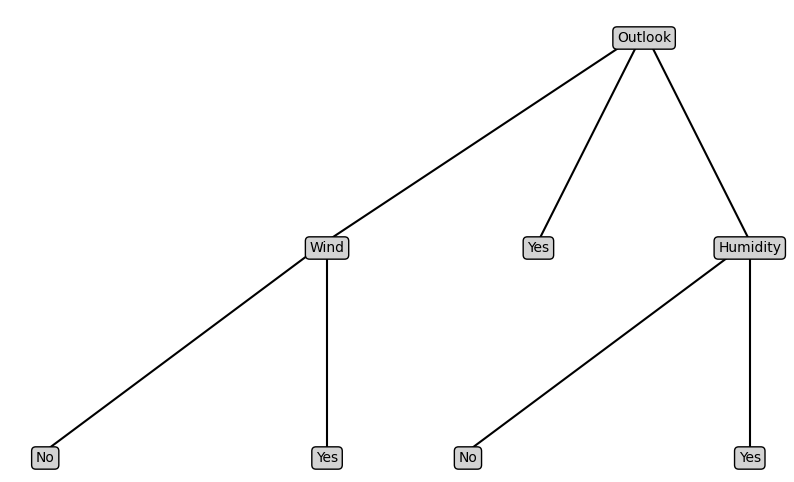

In [ ]:
calculate_ID3()

**Question-2**

**Implementation of C-4.5 Algorithm**

In [ ]:
def find_entropy(data, rows):
    yes = sum(1 for i in rows if data[i][-1] == 'Yes')
    no = len(rows) - yes
    if yes == 0 or no == 0:
        print(f"Entropy = 0 (pure {'Yes' if yes > 0 else 'No'})")
        return 0, 1 if yes > 0 else 0

    x, y = yes / (yes + no), no / (yes + no)
    entropy = -x * math.log2(x) - y * math.log2(y) if x and y else 0
    print(f"Calculated Entropy for rows {rows}: {entropy:.4f} (Yes: {yes}, No: {no})")
    return entropy, -1

In [ ]:
def find_split_info(data, rows, attr_idx):
    split_info = 0
    value_counts = {key: sum(1 for i in rows if data[i][attr_idx] == key) for key in set(data[i][attr_idx] for i in rows)}
    for count in value_counts.values():
        proportion = count / len(rows)
        split_info -= proportion * math.log2(proportion) if proportion else 0
    print(f"Split Information for attribute '{attribute[attr_idx]}': {split_info:.4f}")
    return split_info

In [ ]:
def find_max_gain_ratio(data, rows, columns):
    base_entropy, answer = find_entropy(data, rows)
    if base_entropy == 0:
        return 0, -1, answer

    max_gain_ratio, best_attr = 0, -1
    for j in columns:
        attr_counts = {key: sum(1 for i in rows if data[i][j] == key) for key in set(data[i][j] for i in rows)}

        gain = base_entropy - sum((attr_counts[key] / len(rows)) * find_entropy(data, [i for i in rows if data[i][j] == key])[0]
                                  for key in attr_counts)

        split_info = find_split_info(data, rows, j)
        gain_ratio = gain / split_info if split_info != 0 else 0

        print(f"Attribute: {attribute[j]}, Gain: {gain:.4f}, Gain Ratio: {gain_ratio:.4f}")

        if gain_ratio > max_gain_ratio:
            max_gain_ratio, best_attr = gain_ratio, j

    print(f"Attribute chosen: {attribute[best_attr]} with Gain Ratio: {max_gain_ratio:.4f}")
    return max_gain_ratio, best_attr, -1


In [ ]:
def build_tree_c4(data, rows, columns):
    max_gain_ratio, attr_idx, answer = find_max_gain_ratio(data, rows, columns)
    if max_gain_ratio == 0:
        return {'value': 'Yes' if answer == 1 else 'No', 'children': []}

    node = {'value': attribute[attr_idx], 'children': []}
    for key in set(data[i][attr_idx] for i in rows):
        child_rows = [i for i in rows if data[i][attr_idx] == key]
        child_tree = build_tree(data, child_rows, [col for col in columns if col != attr_idx])
        child_tree['decision'] = key
        node['children'].append(child_tree)
    return node

In [ ]:
def traverse_tree(node, depth=0):
    print(f"{'  ' * depth}{node.get('decision', 'Root')}: {node['value']}")
    for child in node['children']:
        traverse_tree(child, depth + 1)

In [ ]:
def plot_tree(node, pos=(0.5, 1), x_parent=None, y_parent=None, ax=None, level_spacing=0.15):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.axis('off')

    x, y = pos
    ax.text(x, y, node['value'], ha='center', va='top',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgray"))

    if x_parent is not None and y_parent is not None:
        ax.plot([x, x_parent], [y, y_parent], 'k-')

    children = node['children']
    if children:
        spacing = 1 / (len(children) + 1)
        for i, child in enumerate(children):
            new_x = x + (i - len(children) / 2) * spacing
            new_y = y - level_spacing
            plot_tree(child, pos=(new_x, new_y), x_parent=x, y_parent=y, ax=ax)

def calculate_c4():
    rows = list(range(14))
    columns = list(range(4))
    root = build_tree_c4(X, rows, columns)
    traverse_tree(root)
    plot_tree(root)
    plt.show()

Calculated Entropy for rows [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]: 0.9403 (Yes: 9, No: 5)
Calculated Entropy for rows [3, 4, 5, 9, 13]: 0.9710 (Yes: 3, No: 2)
Entropy = 0 (pure Yes)
Calculated Entropy for rows [0, 1, 7, 8, 10]: 0.9710 (Yes: 2, No: 3)
Split Information for attribute 'Outlook': 1.5774
Attribute: Outlook, Gain: 0.2467, Gain Ratio: 0.1564
Calculated Entropy for rows [0, 1, 2, 12]: 1.0000 (Yes: 2, No: 2)
Calculated Entropy for rows [3, 7, 9, 10, 11, 13]: 0.9183 (Yes: 4, No: 2)
Calculated Entropy for rows [4, 5, 6, 8]: 0.8113 (Yes: 3, No: 1)
Split Information for attribute 'Temp': 1.5567
Attribute: Temp, Gain: 0.0292, Gain Ratio: 0.0188
Calculated Entropy for rows [0, 1, 2, 3, 7, 11, 13]: 0.9852 (Yes: 3, No: 4)
Calculated Entropy for rows [4, 5, 6, 8, 9, 10, 12]: 0.5917 (Yes: 6, No: 1)
Split Information for attribute 'Humidity': 1.0000
Attribute: Humidity, Gain: 0.1518, Gain Ratio: 0.1518
Calculated Entropy for rows [1, 5, 6, 10, 11, 13]: 1.0000 (Yes: 3, No: 3)
Calc

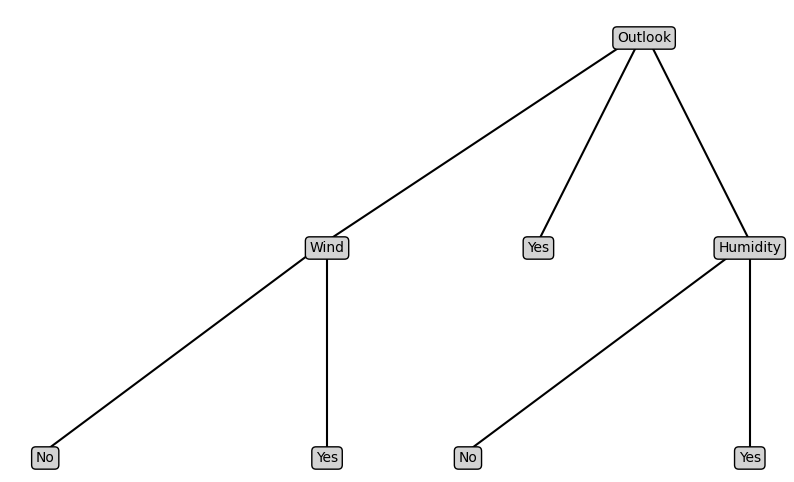

In [ ]:
calculate_c4()

**Question-3**

**Implementation of CART Algorithm**

Calculated Gini for rows [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]: 0.4592 (Yes: 9, No: 5)
Calculated Gini for rows [3, 4, 5, 9, 13]: 0.4800 (Yes: 3, No: 2)
Gini = 0 (pure Yes)
Calculated Gini for rows [0, 1, 7, 8, 10]: 0.4800 (Yes: 2, No: 3)
Attribute: Outlook, Weighted Gini: 0.3429
Calculated Gini for rows [0, 1, 2, 12]: 0.5000 (Yes: 2, No: 2)
Calculated Gini for rows [3, 7, 9, 10, 11, 13]: 0.4444 (Yes: 4, No: 2)
Calculated Gini for rows [4, 5, 6, 8]: 0.3750 (Yes: 3, No: 1)
Attribute: Temp, Weighted Gini: 0.4405
Calculated Gini for rows [0, 1, 2, 3, 7, 11, 13]: 0.4898 (Yes: 3, No: 4)
Calculated Gini for rows [4, 5, 6, 8, 9, 10, 12]: 0.2449 (Yes: 6, No: 1)
Attribute: Humidity, Weighted Gini: 0.3673
Calculated Gini for rows [1, 5, 6, 10, 11, 13]: 0.5000 (Yes: 3, No: 3)
Calculated Gini for rows [0, 2, 3, 4, 7, 8, 9, 12]: 0.3750 (Yes: 6, No: 2)
Attribute: Wind, Weighted Gini: 0.4286
Attribute chosen: Outlook with Gini: 0.3429
Calculated Gini for rows [3, 4, 5, 9, 13]: 0.4800 (Yes: 3

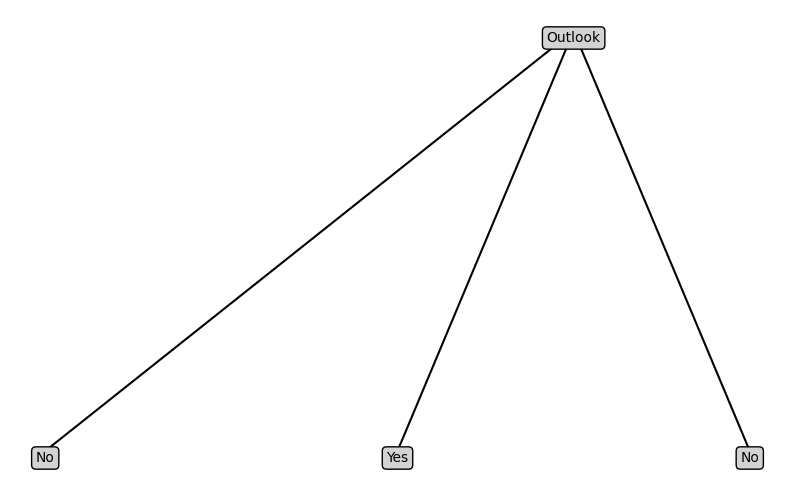

In [ ]:
def gini_index(data, rows):
    yes = sum(1 for i in rows if data[i][-1] == 'Yes')
    no = len(rows) - yes
    if yes == 0 or no == 0:
        print(f"Gini = 0 (pure {'Yes' if yes > 0 else 'No'})")
        return 0, 1 if yes > 0 else 0

    p_yes, p_no = yes / (yes + no), no / (yes + no)
    gini = 1 - p_yes ** 2 - p_no ** 2
    print(f"Calculated Gini for rows {rows}: {gini:.4f} (Yes: {yes}, No: {no})")
    return gini, -1

def max_gini_split(data, rows, columns):
    base_gini, answer = gini_index(data, rows)
    if base_gini == 0:
        return 0, -1, answer

    min_gini, best_attr = float("inf"), -1
    for j in columns:
        attr_counts = {key: sum(1 for i in rows if data[i][j] == key) for key in set(data[i][j] for i in rows)}
        weighted_gini = sum(
            (attr_counts[key] / len(rows)) * gini_index(data, [i for i in rows if data[i][j] == key])[0]
            for key in attr_counts
        )
        print(f"Attribute: {attribute[j]}, Weighted Gini: {weighted_gini:.4f}")

        if weighted_gini < min_gini:
            min_gini, best_attr = weighted_gini, j

    print(f"Attribute chosen: {attribute[best_attr]} with Gini: {min_gini:.4f}")
    return min_gini, best_attr, -1

def build_cart_tree(data, rows, columns):
    min_gini, attr_idx, answer = max_gini_split(data, rows, columns)
    if min_gini == 0:
        return {'value': 'Yes' if answer == 1 else 'No', 'children': []}

    node = {'value': attribute[attr_idx], 'children': []}
    for key in set(data[i][attr_idx] for i in rows):
        child_rows = [i for i in rows if data[i][attr_idx] == key]
        child_tree = build_cart_tree(data, child_rows, [col for col in columns if col != attr_idx])
        child_tree['decision'] = key
        node['children'].append(child_tree)
    return node

def traverse_tree(node, depth=0):
    print(f"{'  ' * depth}{node.get('decision', 'Root')}: {node['value']}")
    for child in node['children']:
        traverse_tree(child, depth + 1)

def plot_tree(node, pos=(0.5, 1), x_parent=None, y_parent=None, ax=None, level_spacing=0.15):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.axis('off')

    x, y = pos
    ax.text(x, y, node['value'], ha='center', va='top',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgray"))

    if x_parent is not None and y_parent is not None:
        ax.plot([x, x_parent], [y, y_parent], 'k-')

    children = node['children']
    if children:
        spacing = 1 / (len(children) + 1)
        for i, child in enumerate(children):
            new_x = x + (i - len(children) / 2) * spacing
            new_y = y - level_spacing
            plot_tree(child, pos=(new_x, new_y), x_parent=x, y_parent=y, ax=ax)

def calculate_cart():
    rows = list(range(14))
    columns = list(range(4))
    root = build_cart_tree(X, rows, columns)
    traverse_tree(root)
    plot_tree(root)
    plt.show()

calculate_cart()
